In [141]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [142]:
# - Import data into Python environment.
pd.set_option("display.max_columns", None)
df=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [143]:
df.shape

(2224, 11)

In [144]:
df["index"] = df["Date_month_year"] + " " + df["Time"]
df["index"] = pd.to_datetime(df["index"])

In [145]:
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

In [146]:
df.set_index(df["index"], inplace=True)
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,index
index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


### Provide the trend chart for the number of complaints at monthly and daily granularity levels.

Text(0.5, 1.0, 'Trends of Complaints (On Daily Basis)')

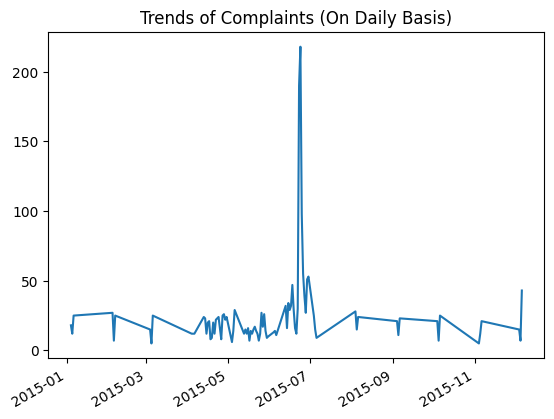

In [245]:
df["Date_month_year"].value_counts().plot()
plt.title("Trends of Complaints (On Daily Basis)")

Text(0.5, 1.0, 'Trends of Complaints (Monthly)')

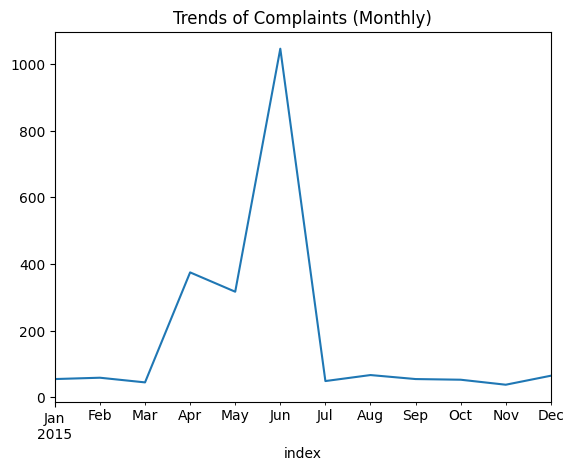

In [244]:
df.groupby(pd.Grouper(freq="M")).size().plot()
plt.title("Trends of Complaints (Monthly)")

### - Provide a table with the frequency of complaint types|

In [166]:
complaint_types=pd.DataFrame(df["Customer Complaint"].value_counts())
complaint_types.columns=["Complaint Type"]
complaint_types

,Complaint Type
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Comcast Billing,11
...,...
Improper Billing and non resolution of issues,1
Deceptive trade,1
intermittent internet,1
Internet Speed on Wireless Connection,1


### Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [177]:
df["Actual_status"]=["Open" if status=="Open" or status=="Pending" else "Closed" for status in df["Status"]]

In [178]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,index,Actual_status
index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed


### - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

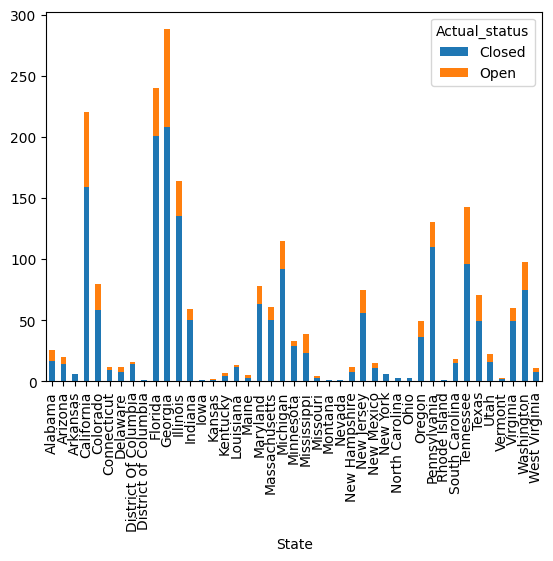

In [193]:
df.groupby(["State", "Actual_status"]).size().unstack().plot(stacked=True, kind="bar")
plt.show()

### Which state has the maximum complaints

In [204]:
df["State"].value_counts()[0:1]

Georgia    288
Name: State, dtype: int64

### Which state has the highest percentage of unresolved complaints

In [219]:
df[df["Actual_status"]=="Closed"]["State"].value_counts()[0:1]

Georgia    208
Name: State, dtype: int64

### - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [229]:
newdf=df[(df['Received Via']== "Internet") | (df['Received Via'] =="Customer Care Call")]

In [241]:
print("Percentage of resolved Complaints :",(newdf["Actual_status"].value_counts()[0]/
                                             newdf["Actual_status"].value_counts().sum())*100)

Percentage of resolved Complaints : 76.75359712230215
